1) Load CALIFORNIA-housing.csv and run a k-means with k=12 on the longitude and latitude columns. Create a scatter plot for longitude and latitude, coloring the nodes according to their class label. Compare boxplots across clusters for each descriptive numerical variable within the dataset. Run the algorithm multiple times and describe what you observe. 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Load the sample data
california_housing = pd.read_csv('./Files/CALIFORNIA-housing.csv')


/mnt/home/doggalok/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


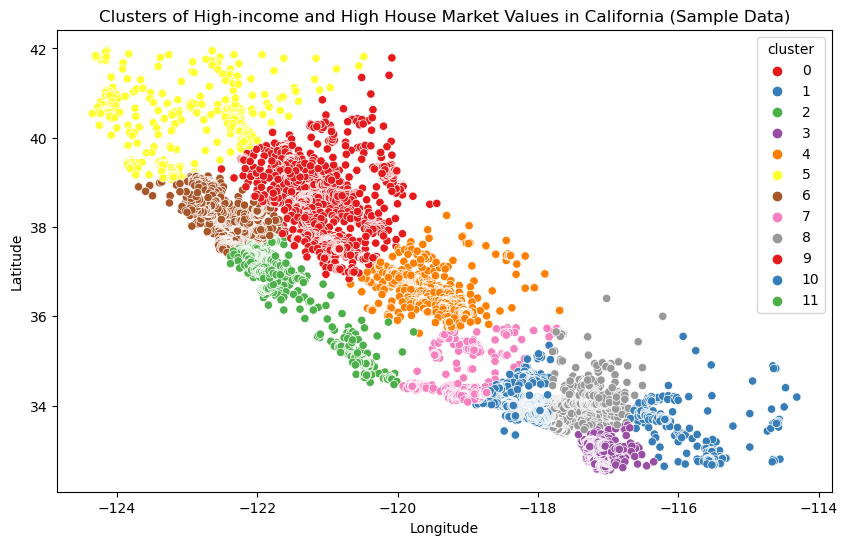

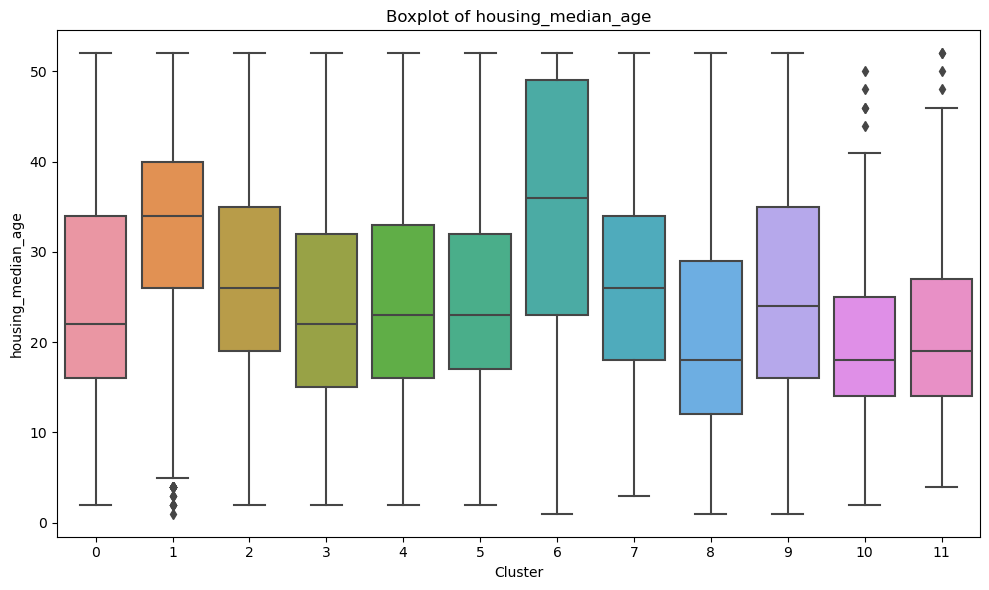

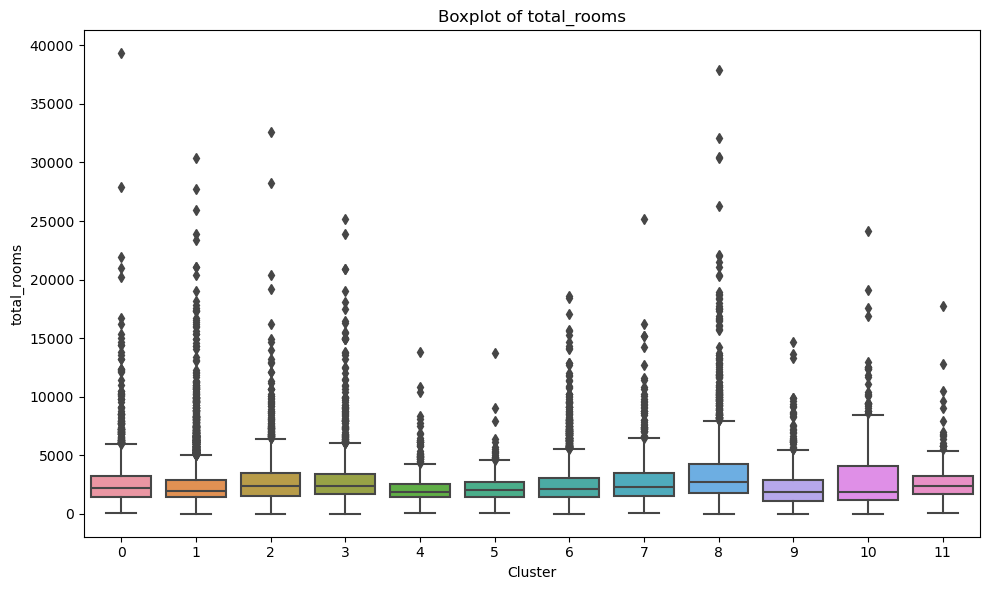

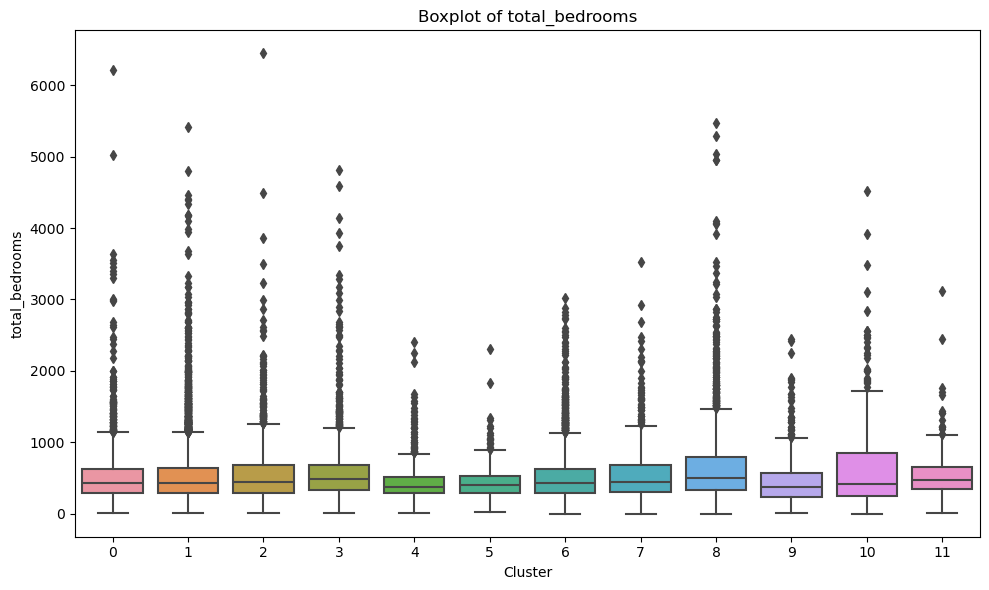

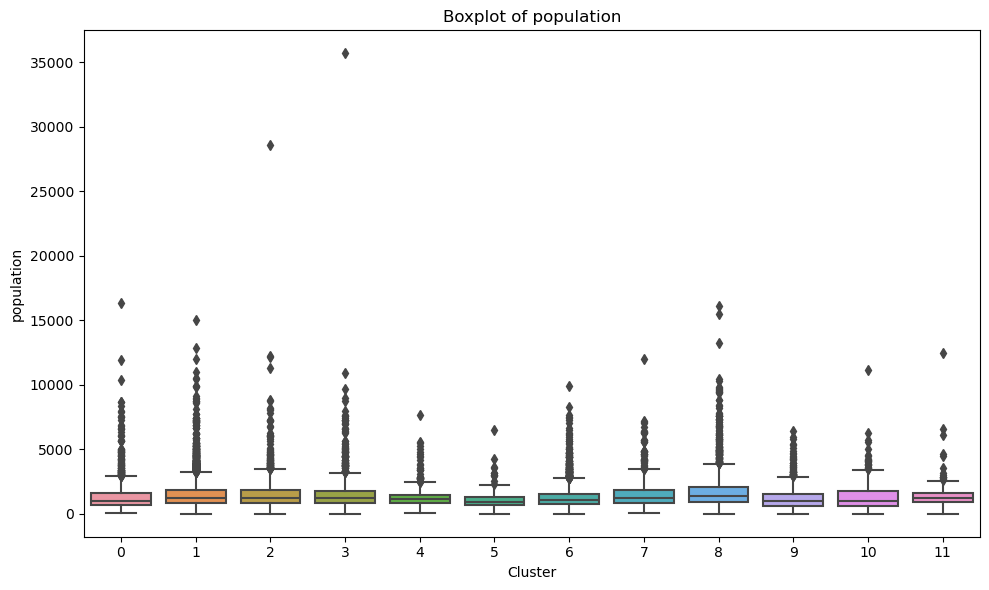

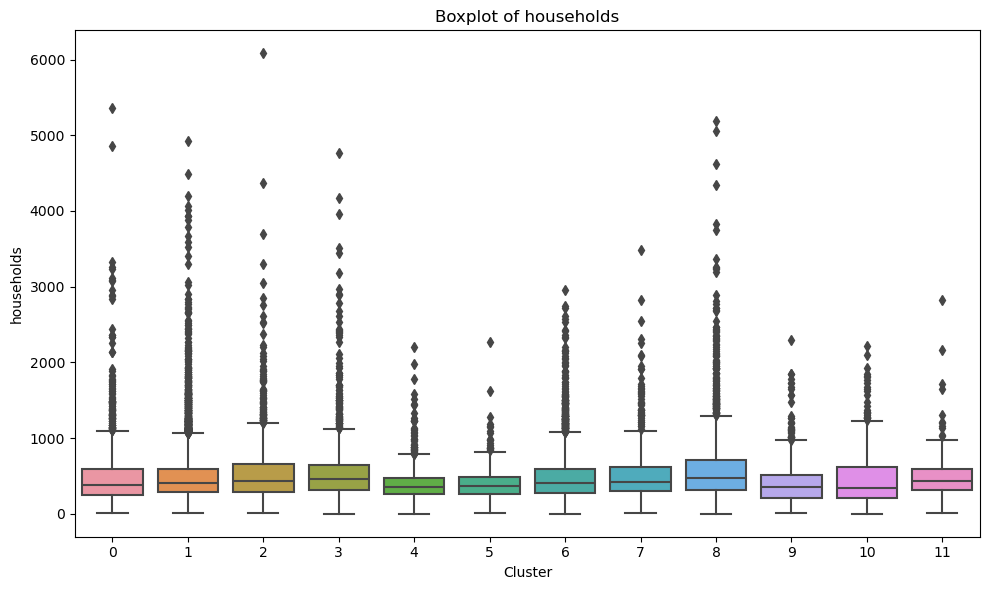

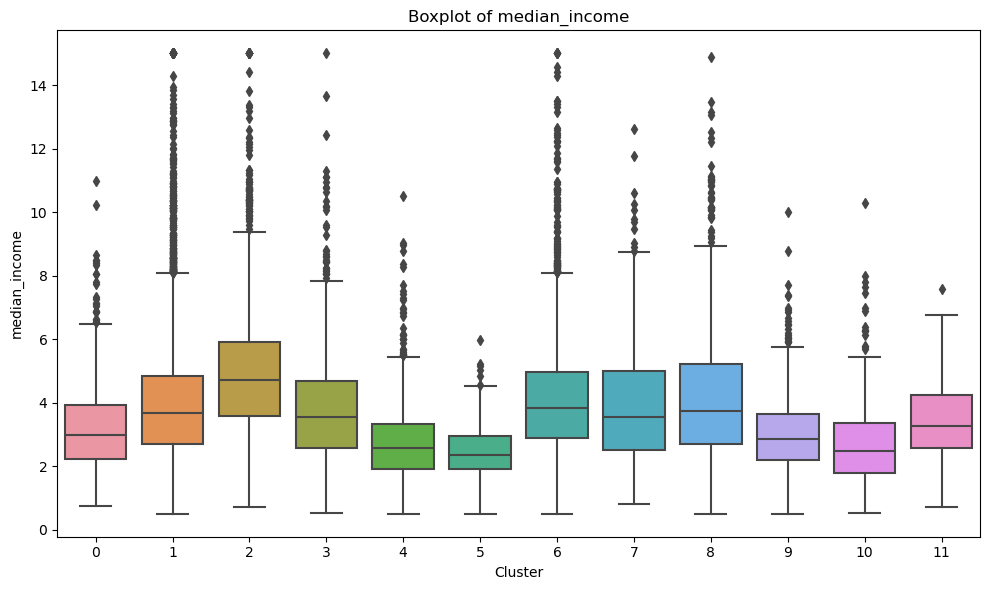

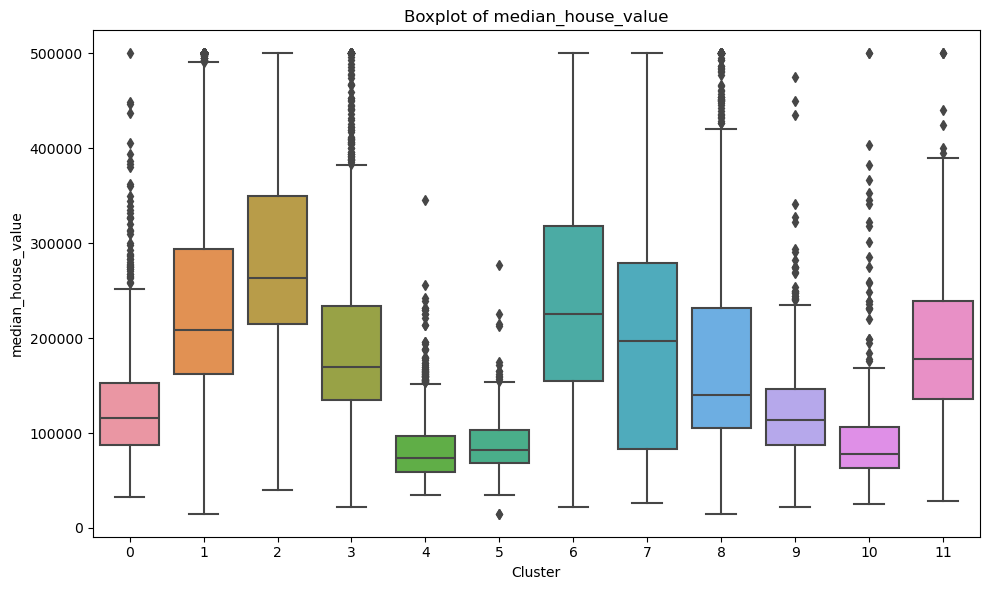

In [26]:

# Create DataFrame
housing_df = pd.DataFrame(california_housing)

# Selecting longitude and latitude columns
X = housing_df[['longitude', 'latitude']]

# Run k-means clustering with k=12
kmeans = KMeans(n_clusters=12, random_state=42)
housing_df['cluster'] = kmeans.fit_predict(X)

# Create a scatter plot for longitude and latitude with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=housing_df, hue='cluster', palette='Set1', legend='full')
plt.title('Clusters of High-income and High House Market Values in California (Sample Data)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Compare boxplots across clusters for each descriptive numerical variable
numerical_variables = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
for i, var in enumerate(numerical_variables):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=var, data=housing_df)
    plt.title('Boxplot of {}'.format(var))
    plt.xlabel('Cluster')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()


2) Load CALIFORNIA-housing.csv and run a DBSCAN with eps=0.2 and min_samples=50 on the longitude and latitude columns. Create a scatter plot for longitude and latitude, coloring the nodes according to their class label. Compare boxplots across clusters for each descriptive numerical variable within the dataset. Run the algorithm multiple times and describe what you observe. Which differences to k-means do you observe? 

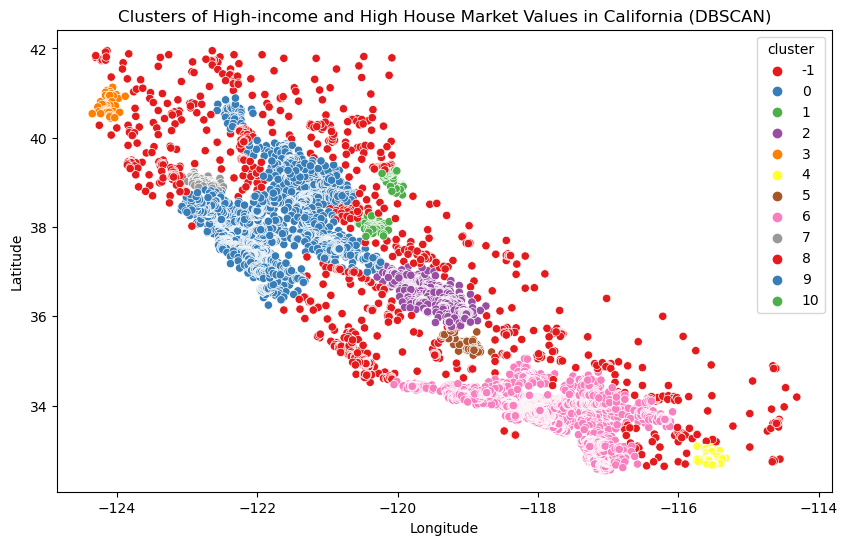

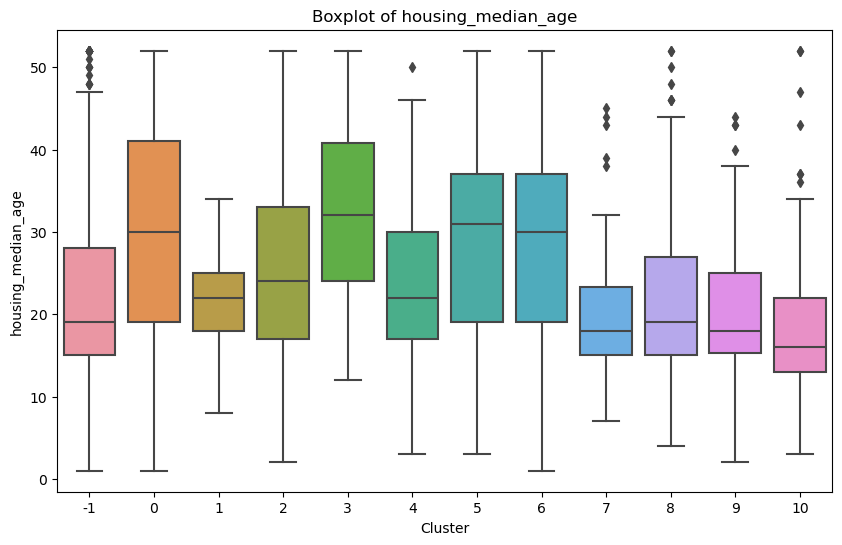

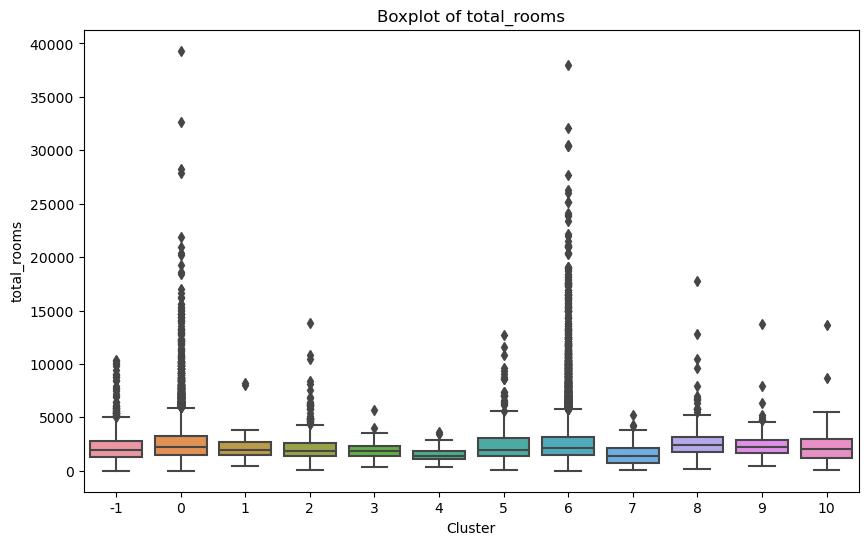

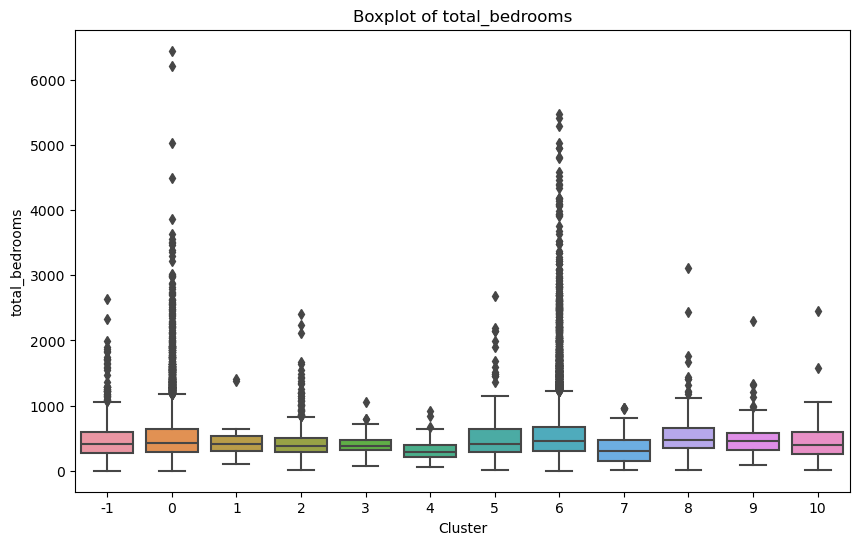

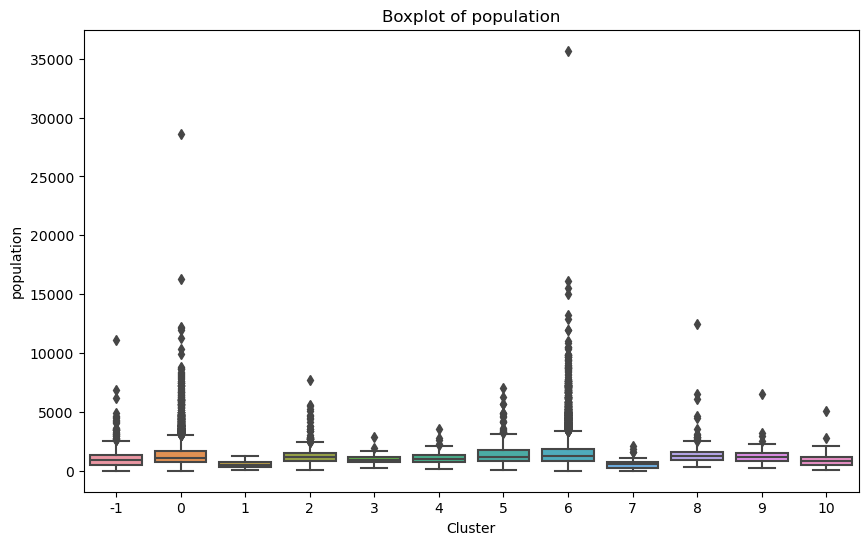

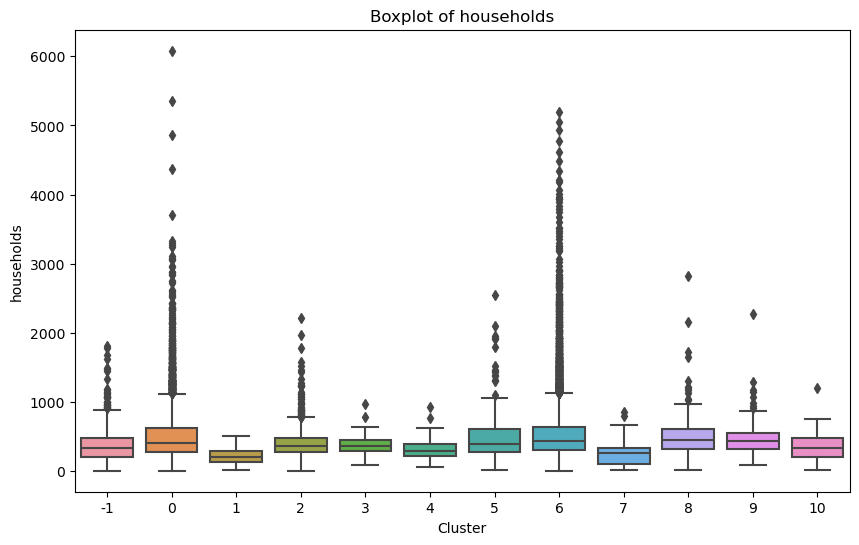

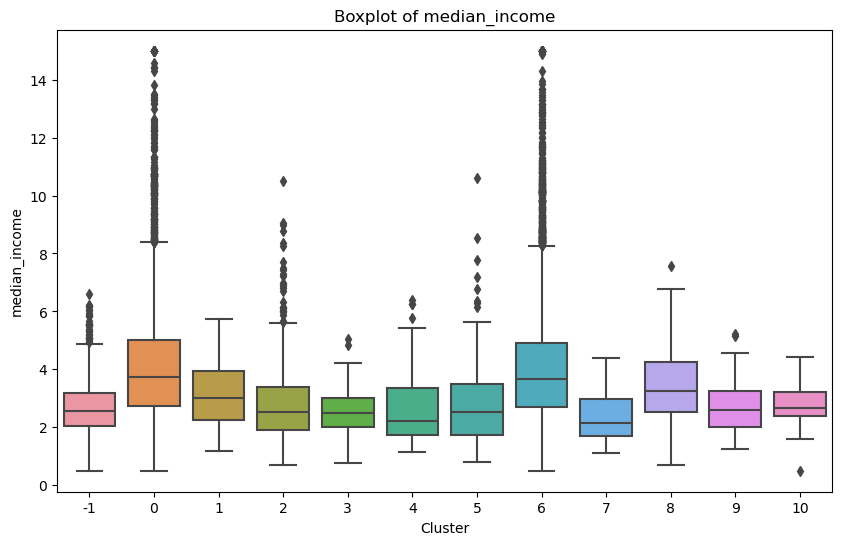

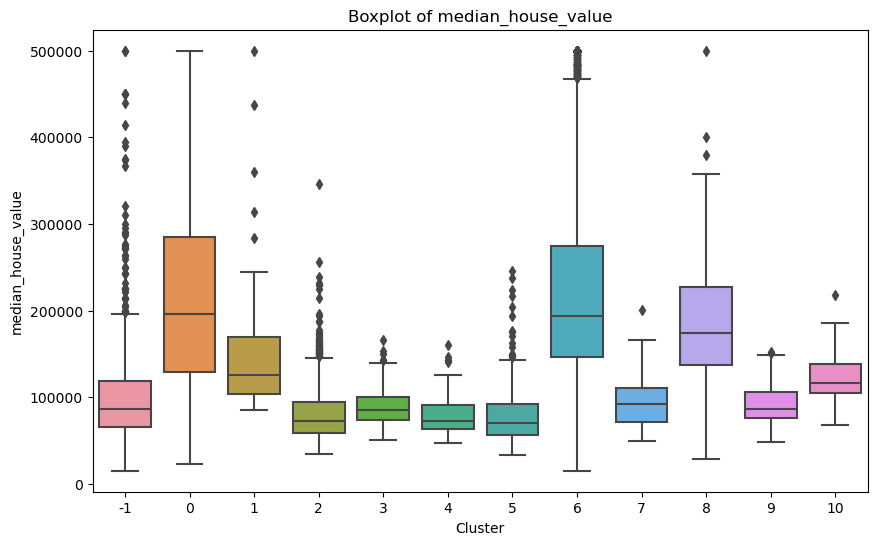

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns

# Load the dataset
california_housing = pd.read_csv("./Files/CALIFORNIA-housing.csv")

# Drop any missing values
california_housing.dropna(inplace=True)

# Selecting longitude and latitude columns
X = california_housing[['longitude', 'latitude']]

# Run DBSCAN with eps=0.2 and min_samples=50
dbscan = DBSCAN(eps=0.2, min_samples=50)
california_housing['cluster'] = dbscan.fit_predict(X)

# Create a scatter plot for longitude and latitude with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=california_housing, hue='cluster', palette='Set1', legend='full')
plt.title('Clusters of High-income and High House Market Values in California (DBSCAN)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Compare boxplots across clusters for each descriptive numerical variable
numerical_variables = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
for i, var in enumerate(numerical_variables):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=var, data=california_housing)
    plt.title('Boxplot of {}'.format(var))
    plt.xlabel('Cluster')
    plt.ylabel(var)
    plt.show()


3) Load CALIFORNIA-housing.csv and run a k-means with k=4 on the median_income and median_house_value columns. Create a scatter plot for longitude and latitude, coloring the nodes according to their class label. Compare boxplots across clusters for each descriptive numerical variable within the dataset and describe what you observe in comparison to 3.1 and 3.2

/mnt/home/doggalok/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


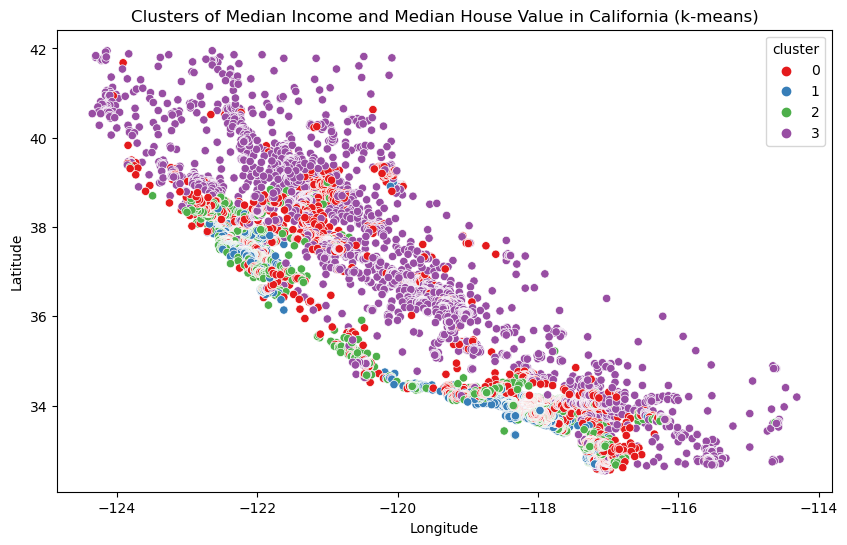

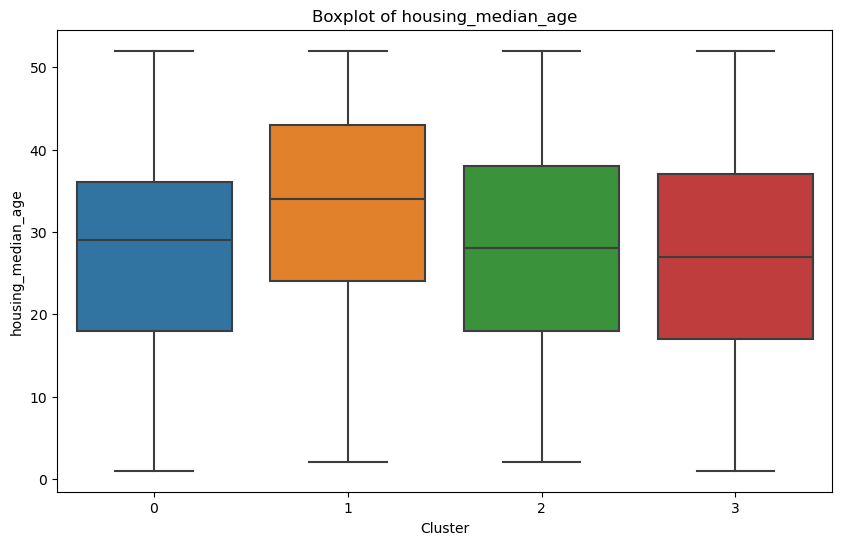

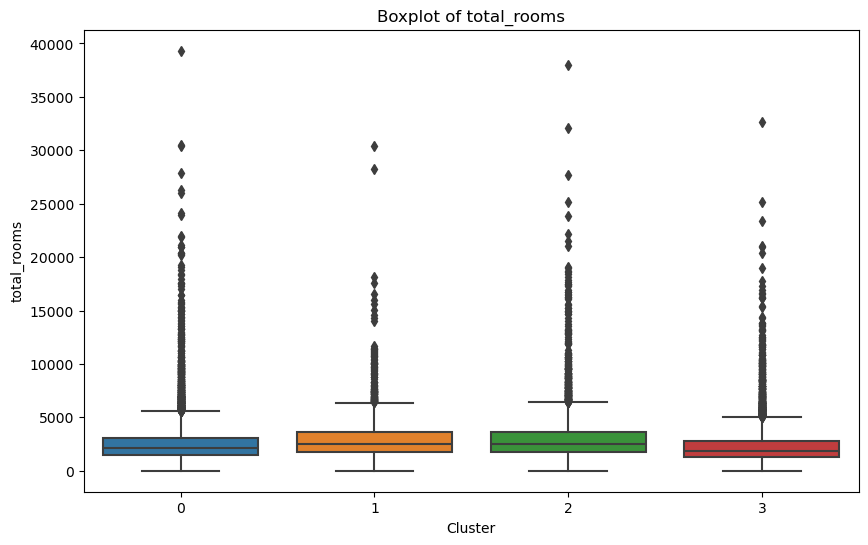

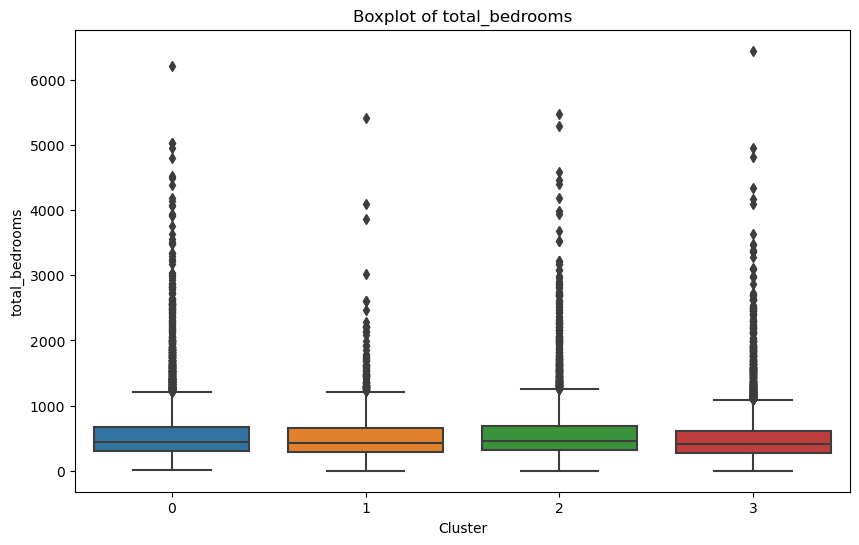

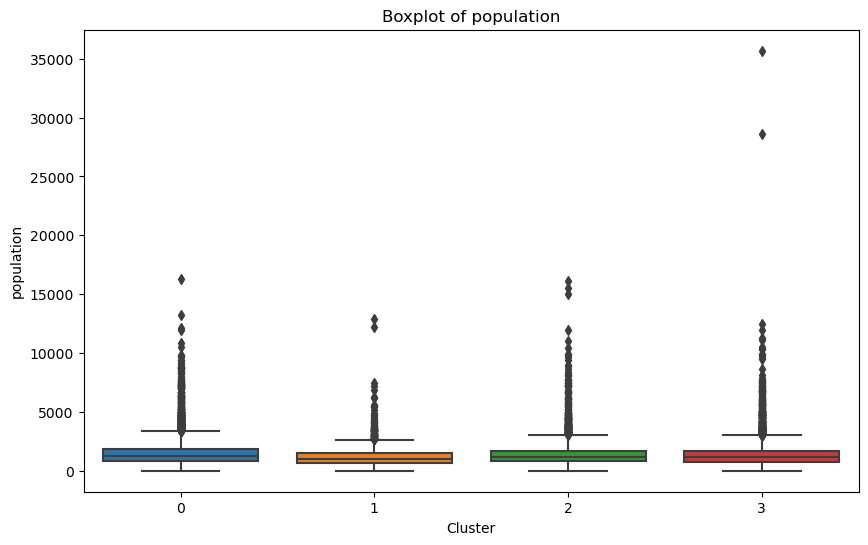

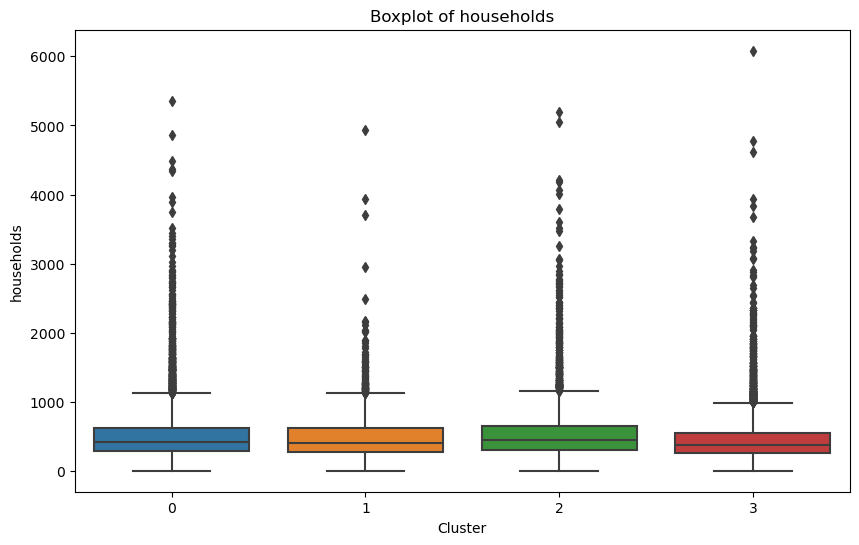

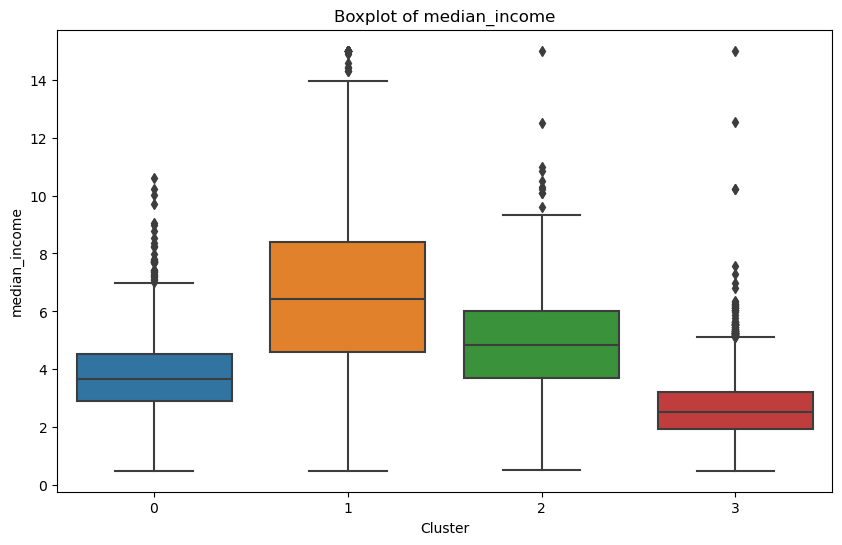

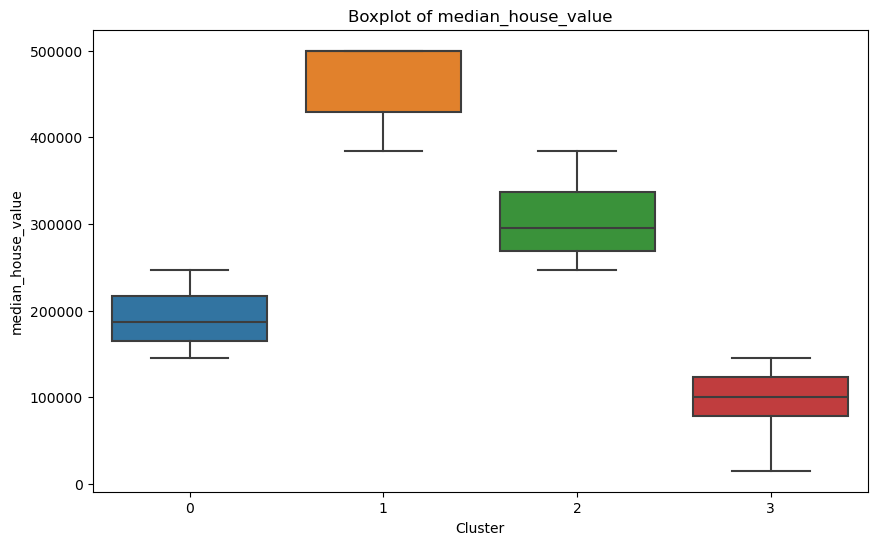

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Load the dataset
california_housing = pd.read_csv("./Files/CALIFORNIA-housing.csv")

# Drop any missing values
california_housing.dropna(inplace=True)

# Selecting median_income and median_house_value columns
X = california_housing[['median_income', 'median_house_value']]

# Run k-means with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
california_housing['cluster'] = kmeans.fit_predict(X)

# Create a scatter plot for longitude and latitude with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=california_housing, hue='cluster', palette='Set1', legend='full')
plt.title('Clusters of Median Income and Median House Value in California (k-means)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Compare boxplots across clusters for each descriptive numerical variable
numerical_variables = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

for i, var in enumerate(numerical_variables):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=var, data=california_housing)
    plt.title('Boxplot of {}'.format(var))
    plt.xlabel('Cluster')
    plt.ylabel(var)
    plt.show()


low-budget marketing campaign for an independent movie in Berlin, Germany is looking for an optimal subway station to put up advertisements. Please help the movie makers reach as many people as possible.

4) Load BERLIN-stations.csv and BERLIN-connections.csv, and use networkx to create a graph based on the stations and connections. Populate the graph using for loops: first across stations to add nodes (with positions set to longitude and latitude) and then across connections to add edges. Then plot the graph based on node position. Then plot as a circular graph. Then plot as kamada kawai graph. Then plot its adjacency matrix. Discuss the differences you see in the plots.

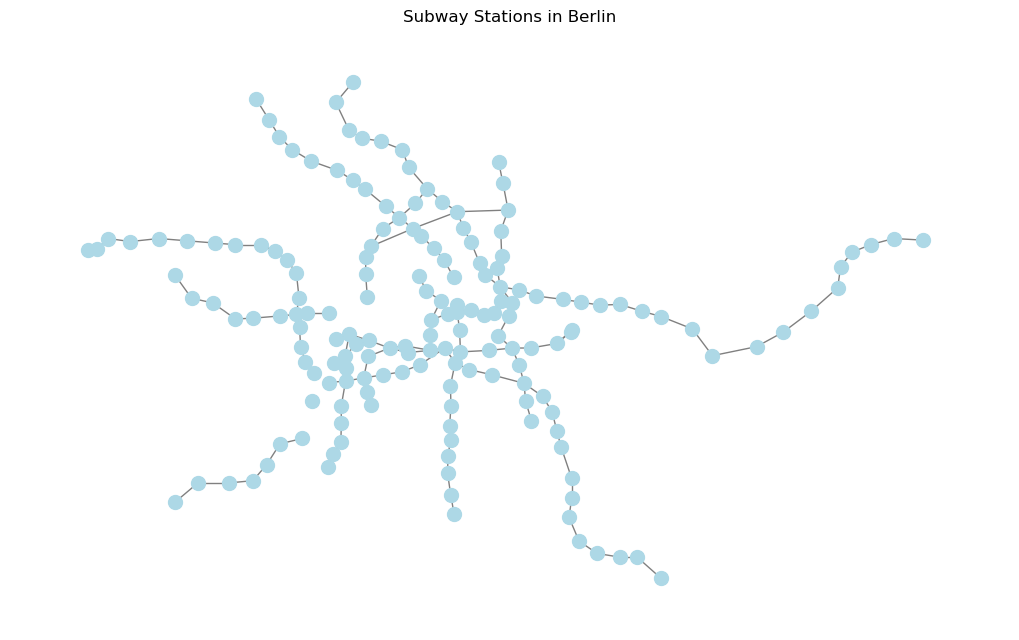

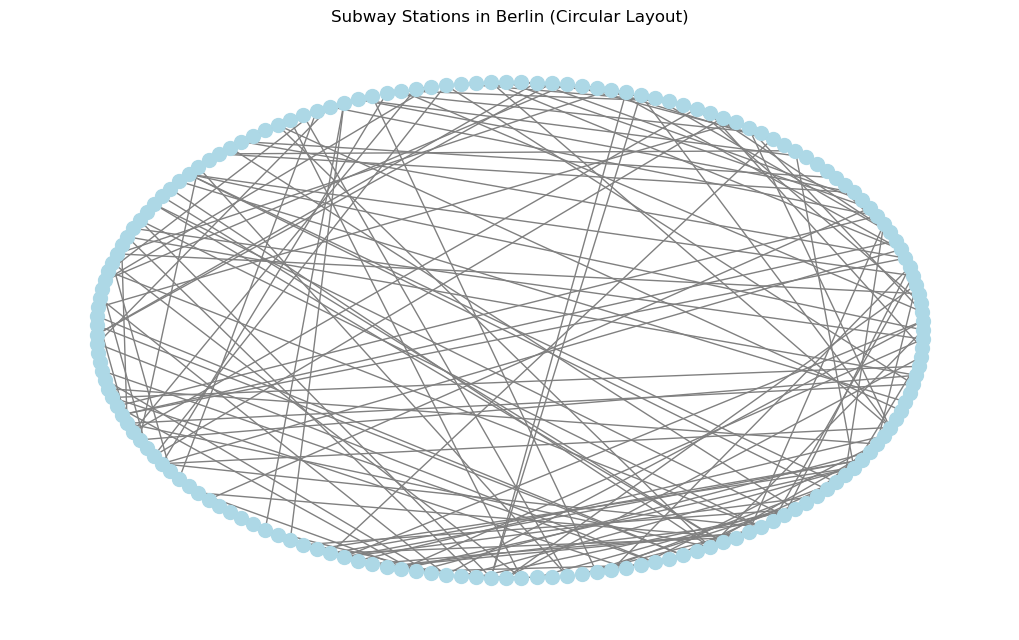

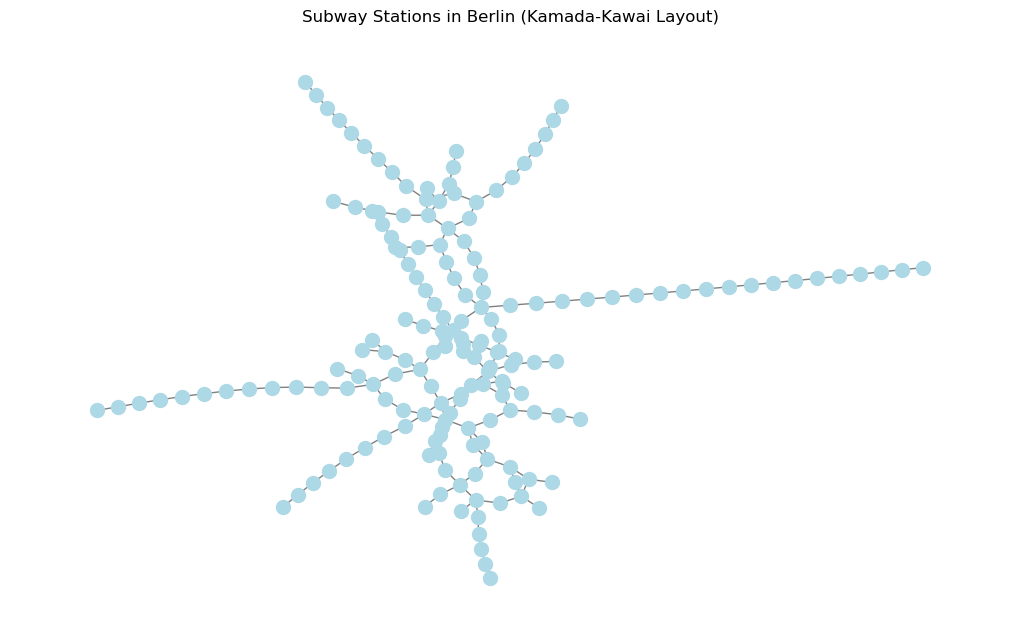

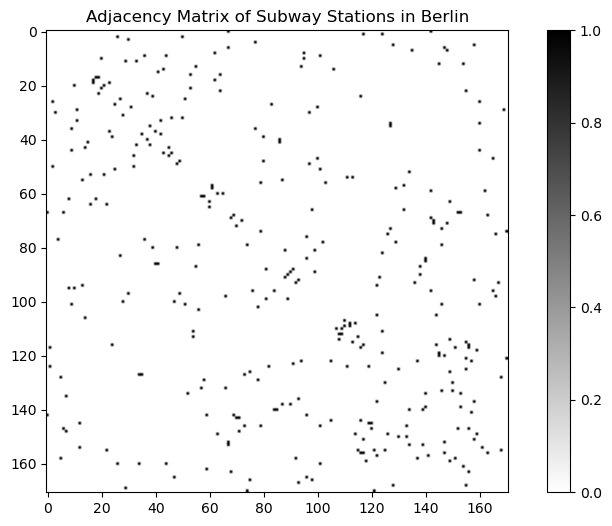

In [18]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the stations and connections data
stations_df = pd.read_csv('./Files/BERLIN-stations.csv')
connections_df = pd.read_csv('./Files/BERLIN-connections.csv')

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph
for index, row in stations_df.iterrows():
    G.add_node(row['name'], pos=(row['longitude'], row['latitude']))

# Add edges to the graph
for index, row in connections_df.iterrows():
    if row['station'] in G.nodes and row['adjacent'] in G.nodes:
        G.add_edge(row['station'], row['adjacent'])

# Plot the graph based on node position
plt.figure(figsize=(10, 6))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=False, node_size=100, node_color='lightblue', edge_color='gray')
plt.title('Subway Stations in Berlin')
plt.show()

# Plot the graph as a circular graph
plt.figure(figsize=(10, 6))
nx.draw_circular(G, with_labels=False, node_size=100, node_color='lightblue', edge_color='gray')
plt.title('Subway Stations in Berlin (Circular Layout)')
plt.show()

# Plot the graph as a Kamada-Kawai graph
plt.figure(figsize=(10, 6))
nx.draw_kamada_kawai(G, with_labels=False, node_size=100, node_color='lightblue', edge_color='gray')
plt.title('Subway Stations in Berlin (Kamada-Kawai Layout)')
plt.show()

# Plot the adjacency matrix of the graph
plt.figure(figsize=(10, 6))
adj_matrix = nx.to_numpy_array(G)
plt.imshow(adj_matrix, cmap='binary')
plt.title('Adjacency Matrix of Subway Stations in Berlin')
plt.colorbar()
plt.show()


In [22]:
import networkx as nx

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
highest_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
highest_degree_node = max(degree_centrality, key=degree_centrality.get)

# Calculate average clustering coefficient
average_clustering_coefficient = nx.average_clustering(G)

# Calculate transitivity
transitivity = nx.transitivity(G)

# Calculate graph density
graph_density = nx.density(G)

# Calculate number of modules and nodes in each module
modules = list(nx.connected_components(G))
num_modules = len(modules)
nodes_per_module = [len(module) for module in modules]

# Calculate average clustering coefficient and small worldness of modules with more than 50 nodes
large_modules = [module for module in modules if len(module) > 50]
average_clustering_coefficient_large_modules = [nx.average_clustering(G.subgraph(module)) for module in large_modules]
small_worldness_large_modules = [nx.smallworld.sigma(G.subgraph(module)) for module in large_modules]

# Print the results
print("Node with highest betweenness centrality:", highest_betweenness_node)
print("Node with highest degree centrality:", highest_degree_node)
print("Average clustering coefficient:", average_clustering_coefficient)
print("Transitivity score:", transitivity)
print("Graph density:", graph_density)
print("Number of modules:", num_modules)
print("Nodes per module:", nodes_per_module)
print("Average clustering coefficient of large modules:", average_clustering_coefficient_large_modules)
print("Small worldness of large modules:", small_worldness_large_modules)


Node with highest betweenness centrality: Bahnhof Berlin-Alexanderplatz
Node with highest degree centrality: Bahnhof Berlin-Alexanderplatz
Average clustering coefficient: 0.0029239766081871343
Transitivity score: 0.012396694214876033
Graph density: 0.012108703130374958
Number of modules: 6
Nodes per module: [137, 7, 24, 1, 1, 1]
Average clustering coefficient of large modules: [0.0036496350364963502]
Small worldness of large modules: [1.4812339212459733]
